There exists a Mean Squared Error Loss function |x -  x̂|². We want you to experiment with different types of loss functions. Consider the following loss functions:

|x -  x̂|³

|x -  x̂|

|x -  x̂|⁴

|x -  x̂|⁷

We want you to train a Linear Regression model using (a.) and (b.) as criterion and a polynomial regression (2nd degree polynomial) model using (c.) and (d.) as criterion. 


Let us setup the linear map `f(x) : x ->  Ax + B ` 

In [2]:
A = 4
B = 13

In [3]:
def f(x) : return A*x + B

## Preparing the datapoints

In [27]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

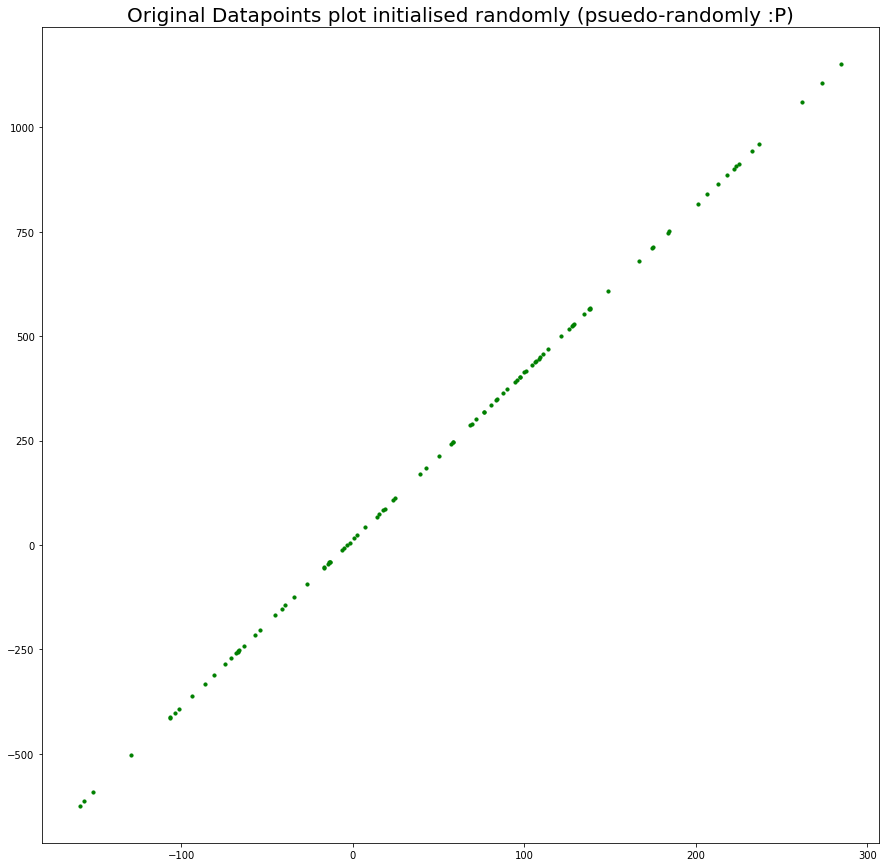

In [4]:

np.random.seed(0)
np.random.seed(7736)
x = np.random.randint(100) + 100 * np.random.normal(0, 1, 100)
x=((np.unique(x)))
x.sort()
y = list(map(f,x))
plt.figure(figsize=(15,15))
plt.title("Original Datapoints plot initialised randomly (psuedo-randomly :P)",fontsize='20')
plt.scatter(x,y,s=10,color="green")

---

### Let us consider a linear polynomial as : `px + q` where we will approximate p and q.

---
## a) using `|x - x̂|³` as the loss metric


In [37]:
def loss_cube(y,y_pred) : return ((y-y_pred)**3)/81/3

In [173]:
p = np.random.random()
q = np.random.random()
print(f"Starting values of p={p} q={q}")
lr = 1e-8
ctr = 0

loss_values=[]
loss_coordinates=[]

prev_loss=1e15

while True :
    
    net_loss = 0
    grad_p = 0
    grad_q = 0
    
    
    
    for i in range(len(x)):
        y_true = y[i]
        x_val = x[i]
        y_pred = p*x_val + q
        net_loss += abs(loss_cube(y_true,y_pred))
        grad_p += (-1)*x_val*((y_true-y_pred)**2)/81
        grad_q += 100*(-1)*((y_true-y_pred)**2)/81
        
    
    net_loss = net_loss/len(x)
    grad_p = grad_p/len(x)
    grad_q = grad_q/len(x)
    
    
    
    
    p -= lr*grad_p
    q -= lr*grad_q
    
    if ctr%1000==0:
            
        loss_values.append(net_loss)
        loss_coordinates.append(ctr)
        print("p={:.2f} q={:.2f} Loss={:.5f}".format(p,q,net_loss))
    ctr+=1
    
    prev_loss=net_loss
    
    if(abs(net_loss)<0.5):
        break
    


Starting values of p=0.9701422855188961 q=0.8135695735146349
p=0.97 q=0.82 Loss=304042.15299
p=2.35 q=1.73 Loss=51134.79133
p=2.88 q=2.08 Loss=16655.93904
p=3.16 q=2.26 Loss=7318.23136
p=3.33 q=2.37 Loss=3818.40178
p=3.45 q=2.45 Loss=2228.22467
p=3.53 q=2.50 Loss=1406.98685
p=3.60 q=2.54 Loss=942.15080
p=3.65 q=2.57 Loss=660.25601
p=3.69 q=2.60 Loss=479.84360
p=3.72 q=2.62 Loss=359.27333
p=3.75 q=2.64 Loss=275.77846
p=3.77 q=2.65 Loss=216.21112
p=3.79 q=2.66 Loss=172.62541
p=3.81 q=2.67 Loss=140.03120
p=3.83 q=2.68 Loss=115.18986
p=3.84 q=2.69 Loss=95.93909
p=3.85 q=2.70 Loss=80.79879
p=3.86 q=2.71 Loss=68.73372
p=3.87 q=2.71 Loss=59.00542
p=3.88 q=2.72 Loss=51.07758
p=3.89 q=2.72 Loss=44.55453
p=3.90 q=2.73 Loss=39.14012
p=3.91 q=2.73 Loss=34.60984
p=3.91 q=2.74 Loss=30.79159
p=3.92 q=2.74 Loss=27.55196
p=3.92 q=2.74 Loss=24.78630
p=3.93 q=2.75 Loss=22.41179
p=3.93 q=2.75 Loss=20.36236
p=3.94 q=2.75 Loss=18.58483
p=3.94 q=2.75 Loss=17.03619
p=3.94 q=2.76 Loss=15.68145
p=3.95 q=2.76 Lo

KeyboardInterrupt: 

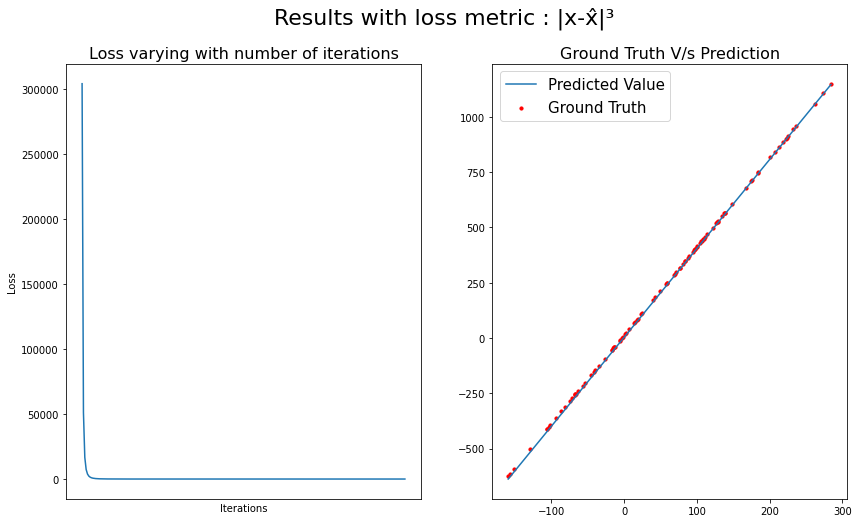

In [174]:

fig,axs = plt.subplots(1,2,figsize=(14,8))

fig.suptitle('Results with loss metric : |x-x̂|³',fontsize='22', fontname="Times New Roman Bold")

axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Iterations")
axs[0].set_xticks([])
axs[0].set_title("Loss varying with number of iterations",fontsize='16')
axs[0].plot(loss_coordinates,loss_values)

Y_pred = p*x+q
axs[1].scatter(x,y,s=10,color="red",label='Ground Truth Data points')
axs[1].plot(x,Y_pred,label='Prediction')
axs[1].set_title("Ground Truth V/s Prediction",fontsize='16')
axs[1].legend(['Predicted Value','Ground Truth'],fontsize='15')

## b) using `|x - x̂|` as the loss metric

In [78]:
def loss_normal(y,y_pred) : return abs(y-y_pred)

In [167]:
p2 = np.random.random()
q2 = np.random.random()
print(f"Starting values of p={p2} q={q2}")
lr = 1e-7
ctr = 0

loss_values2=[]
loss_coordinates2=[]

# For checking if we're overshooting
prev_loss=1e10

while True :
    
    net_loss = 0
    grad_p = 0
    grad_q = 0
    
    
    
    for i in range(len(x)):
        y_true = y[i]
        x_val = x[i]
        y_pred = p2*x_val + q2
        net_loss += abs(loss_normal(y_true,y_pred))
        grad_p += (-1)*x_val
        grad_q += (-10)
        
    
    net_loss = net_loss/len(x)
    grad_p = grad_p/len(x)
    grad_q = grad_q/len(x)
    
    # Checking if the loss is going to increase so we handle the grad's accordingly
#     while True:
#         temp_p2 = p2 - lr*grad_p
#         temp_q2 = q2 - lr*grad_q
#         temp_y_pred = temp_p2*x+temp_q2
#         temp_loss = sum(loss_normal(y,temp_y_pred))/len(y)
        
#         if net_loss>=prev_loss:
#             print("FOUND ")
#             lr = lr*0.9
#         else:
#             net_loss=temp_loss
#             break
    
    
    temp_p2 = p2 - lr*grad_p
    temp_q2 = q2 - lr*grad_q
    temp_y_pred = temp_p2*x+temp_q2
    temp_loss = sum(loss_normal(y,temp_y_pred))/len(y)
    
    if temp_loss>=prev_loss:
        while True:
            lr*=0.95
            temp_p2 = p2 - lr*grad_p
            temp_q2 = q2 - lr*grad_q
            temp_y_pred = temp_p2*x+temp_q2
            temp_loss = sum(loss_normal(y,temp_y_pred))/len(y)
            if temp_loss<prev_loss:
                net_loss = temp_loss
                break
            
        
    
    
    p2 -= lr*grad_p
    q2 -= lr*grad_q
    
    if ctr%1000==0:
        loss_values2.append(net_loss)
        loss_coordinates2.append(ctr)
        print("p={:.2f} q={:.2f} Loss={:.3f} Prev_Loss={:.3f} Temp_loss={:.3f}".format(p2,q2,net_loss,prev_loss,temp_loss))
    ctr+=1
    prev_loss=net_loss
    
    if(abs(net_loss)<0.5):
        break
    


Starting values of p=0.5472285659331411 q=0.07439679918698594
p=0.55 q=0.07 Loss=340.232 Prev_Loss=10000000000.000 Temp_loss=340.231
p=0.55 q=0.08 Loss=339.704 Prev_Loss=339.704 Temp_loss=339.703
p=0.56 q=0.08 Loss=339.176 Prev_Loss=339.177 Temp_loss=339.176
p=0.56 q=0.08 Loss=338.648 Prev_Loss=338.649 Temp_loss=338.648
p=0.57 q=0.08 Loss=338.121 Prev_Loss=338.121 Temp_loss=338.120
p=0.57 q=0.08 Loss=337.593 Prev_Loss=337.594 Temp_loss=337.592
p=0.58 q=0.08 Loss=337.065 Prev_Loss=337.066 Temp_loss=337.065
p=0.59 q=0.08 Loss=336.538 Prev_Loss=336.538 Temp_loss=336.537
p=0.59 q=0.08 Loss=336.010 Prev_Loss=336.010 Temp_loss=336.009
p=0.60 q=0.08 Loss=335.482 Prev_Loss=335.483 Temp_loss=335.482
p=0.60 q=0.08 Loss=334.954 Prev_Loss=334.955 Temp_loss=334.954
p=0.61 q=0.09 Loss=334.427 Prev_Loss=334.427 Temp_loss=334.426
p=0.61 q=0.09 Loss=333.899 Prev_Loss=333.900 Temp_loss=333.899
p=0.62 q=0.09 Loss=333.371 Prev_Loss=333.372 Temp_loss=333.371
p=0.62 q=0.09 Loss=332.844 Prev_Loss=332.844 Tem

p=1.25 q=0.20 Loss=271.629 Prev_Loss=271.630 Temp_loss=271.629
p=1.26 q=0.21 Loss=271.101 Prev_Loss=271.102 Temp_loss=271.101
p=1.26 q=0.21 Loss=270.574 Prev_Loss=270.574 Temp_loss=270.573
p=1.27 q=0.21 Loss=270.046 Prev_Loss=270.047 Temp_loss=270.046
p=1.27 q=0.21 Loss=269.518 Prev_Loss=269.519 Temp_loss=269.518
p=1.28 q=0.21 Loss=268.991 Prev_Loss=268.991 Temp_loss=268.990
p=1.28 q=0.21 Loss=268.463 Prev_Loss=268.463 Temp_loss=268.462
p=1.29 q=0.21 Loss=267.935 Prev_Loss=267.936 Temp_loss=267.935
p=1.30 q=0.21 Loss=267.408 Prev_Loss=267.408 Temp_loss=267.407
p=1.30 q=0.21 Loss=266.880 Prev_Loss=266.880 Temp_loss=266.879
p=1.31 q=0.21 Loss=266.352 Prev_Loss=266.353 Temp_loss=266.352
p=1.31 q=0.22 Loss=265.824 Prev_Loss=265.825 Temp_loss=265.824
p=1.32 q=0.22 Loss=265.297 Prev_Loss=265.297 Temp_loss=265.296
p=1.32 q=0.22 Loss=264.769 Prev_Loss=264.769 Temp_loss=264.768
p=1.33 q=0.22 Loss=264.241 Prev_Loss=264.242 Temp_loss=264.241
p=1.33 q=0.22 Loss=263.714 Prev_Loss=263.714 Temp_loss=

p=1.97 q=0.34 Loss=202.008 Prev_Loss=202.009 Temp_loss=202.008
p=1.97 q=0.34 Loss=201.481 Prev_Loss=201.481 Temp_loss=201.480
p=1.98 q=0.34 Loss=200.954 Prev_Loss=200.954 Temp_loss=200.953
p=1.98 q=0.34 Loss=200.427 Prev_Loss=200.427 Temp_loss=200.426
p=1.99 q=0.34 Loss=199.899 Prev_Loss=199.900 Temp_loss=199.899
p=1.99 q=0.34 Loss=199.372 Prev_Loss=199.373 Temp_loss=199.372
p=2.00 q=0.34 Loss=198.845 Prev_Loss=198.846 Temp_loss=198.845
p=2.01 q=0.34 Loss=198.319 Prev_Loss=198.319 Temp_loss=198.318
p=2.01 q=0.34 Loss=197.792 Prev_Loss=197.793 Temp_loss=197.792
p=2.02 q=0.35 Loss=197.266 Prev_Loss=197.266 Temp_loss=197.265
p=2.02 q=0.35 Loss=196.739 Prev_Loss=196.740 Temp_loss=196.739
p=2.03 q=0.35 Loss=196.213 Prev_Loss=196.213 Temp_loss=196.212
p=2.03 q=0.35 Loss=195.686 Prev_Loss=195.687 Temp_loss=195.686
p=2.04 q=0.35 Loss=195.160 Prev_Loss=195.160 Temp_loss=195.159
p=2.04 q=0.35 Loss=194.633 Prev_Loss=194.634 Temp_loss=194.633
p=2.05 q=0.35 Loss=194.107 Prev_Loss=194.107 Temp_loss=

p=2.68 q=0.47 Loss=132.508 Prev_Loss=132.508 Temp_loss=132.507
p=2.69 q=0.47 Loss=131.981 Prev_Loss=131.982 Temp_loss=131.981
p=2.69 q=0.47 Loss=131.455 Prev_Loss=131.455 Temp_loss=131.454
p=2.70 q=0.47 Loss=130.928 Prev_Loss=130.929 Temp_loss=130.928
p=2.71 q=0.47 Loss=130.402 Prev_Loss=130.402 Temp_loss=130.401
p=2.71 q=0.47 Loss=129.875 Prev_Loss=129.876 Temp_loss=129.875
p=2.72 q=0.47 Loss=129.349 Prev_Loss=129.349 Temp_loss=129.348
p=2.72 q=0.48 Loss=128.822 Prev_Loss=128.823 Temp_loss=128.822
p=2.73 q=0.48 Loss=128.296 Prev_Loss=128.296 Temp_loss=128.295
p=2.73 q=0.48 Loss=127.769 Prev_Loss=127.770 Temp_loss=127.769
p=2.74 q=0.48 Loss=127.243 Prev_Loss=127.243 Temp_loss=127.242
p=2.74 q=0.48 Loss=126.716 Prev_Loss=126.717 Temp_loss=126.716
p=2.75 q=0.48 Loss=126.190 Prev_Loss=126.190 Temp_loss=126.189
p=2.75 q=0.48 Loss=125.663 Prev_Loss=125.664 Temp_loss=125.663
p=2.76 q=0.48 Loss=125.137 Prev_Loss=125.138 Temp_loss=125.136
p=2.76 q=0.48 Loss=124.611 Prev_Loss=124.611 Temp_loss=

p=3.41 q=0.60 Loss=62.404 Prev_Loss=62.404 Temp_loss=62.403
p=3.42 q=0.60 Loss=61.887 Prev_Loss=61.887 Temp_loss=61.886
p=3.42 q=0.60 Loss=61.370 Prev_Loss=61.370 Temp_loss=61.369
p=3.43 q=0.61 Loss=60.853 Prev_Loss=60.853 Temp_loss=60.852
p=3.43 q=0.61 Loss=60.336 Prev_Loss=60.336 Temp_loss=60.335
p=3.44 q=0.61 Loss=59.819 Prev_Loss=59.819 Temp_loss=59.818
p=3.44 q=0.61 Loss=59.301 Prev_Loss=59.302 Temp_loss=59.301
p=3.45 q=0.61 Loss=58.784 Prev_Loss=58.785 Temp_loss=58.784
p=3.45 q=0.61 Loss=58.267 Prev_Loss=58.268 Temp_loss=58.267
p=3.46 q=0.61 Loss=57.750 Prev_Loss=57.751 Temp_loss=57.750
p=3.46 q=0.61 Loss=57.233 Prev_Loss=57.234 Temp_loss=57.233
p=3.47 q=0.61 Loss=56.716 Prev_Loss=56.717 Temp_loss=56.716
p=3.48 q=0.61 Loss=56.199 Prev_Loss=56.200 Temp_loss=56.199
p=3.48 q=0.62 Loss=55.682 Prev_Loss=55.683 Temp_loss=55.682
p=3.49 q=0.62 Loss=55.165 Prev_Loss=55.166 Temp_loss=55.165
p=3.49 q=0.62 Loss=54.648 Prev_Loss=54.649 Temp_loss=54.648
p=3.50 q=0.62 Loss=54.131 Prev_Loss=54.1

KeyboardInterrupt: 

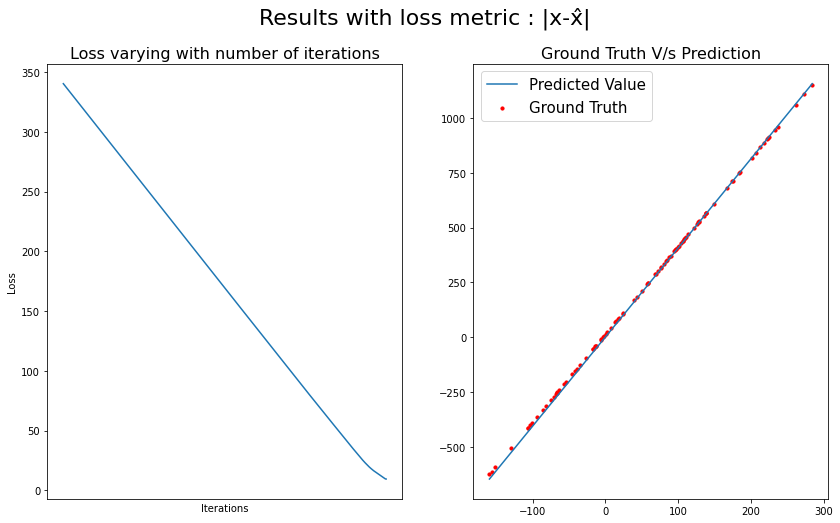

In [168]:

fig,axs = plt.subplots(1,2,figsize=(14,8))

fig.suptitle('Results with loss metric : |x-x̂|',fontsize='22', fontname="Times New Roman Bold")


axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Iterations")
axs[0].set_xticks([])
axs[0].set_title("Loss varying with number of iterations",fontsize='16')
axs[0].plot(loss_coordinates2,loss_values2)

Y_pred2 = p2*x+q2
axs[1].scatter(x,y,s=10,color="red",label='Ground Truth Data points')
axs[1].plot(x,Y_pred2,label='Prediction')
axs[1].set_title("Ground Truth V/s Prediction",fontsize='16')
axs[1].legend(['Predicted Value','Ground Truth'],fontsize='15')

In [171]:
len(loss_values2)

649

/home/merp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/merp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


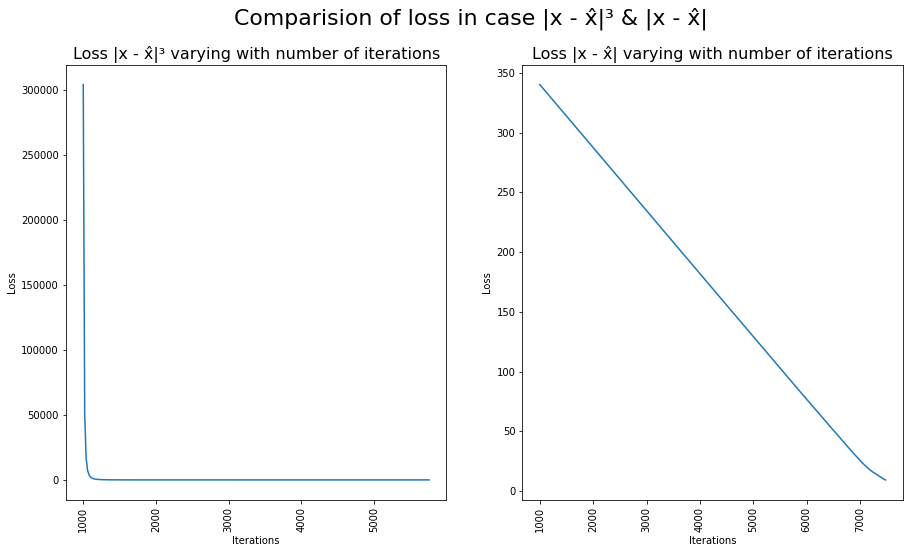

In [178]:
fig,axs = plt.subplots(1,2,figsize=(15,8))

fig.suptitle('Comparision of loss in case |x - x̂|³ & |x - x̂|',fontsize='22')


axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Iterations")
axs[0].set_xticklabels(loss_coordinates,rotation='vertical')
axs[0].set_title("Loss |x - x̂|³ varying with number of iterations",fontsize='16')
axs[0].plot(loss_coordinates,loss_values)


axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Iterations")
axs[1].set_xticklabels(loss_coordinates2,rotation='vertical')
axs[1].set_title("Loss |x - x̂| varying with number of iterations",fontsize='16')
axs[1].plot(loss_coordinates2,loss_values2)

---
# Polynomial Regression 

In [60]:
def g(x): return 3*(x**2) - 5*x  + 4

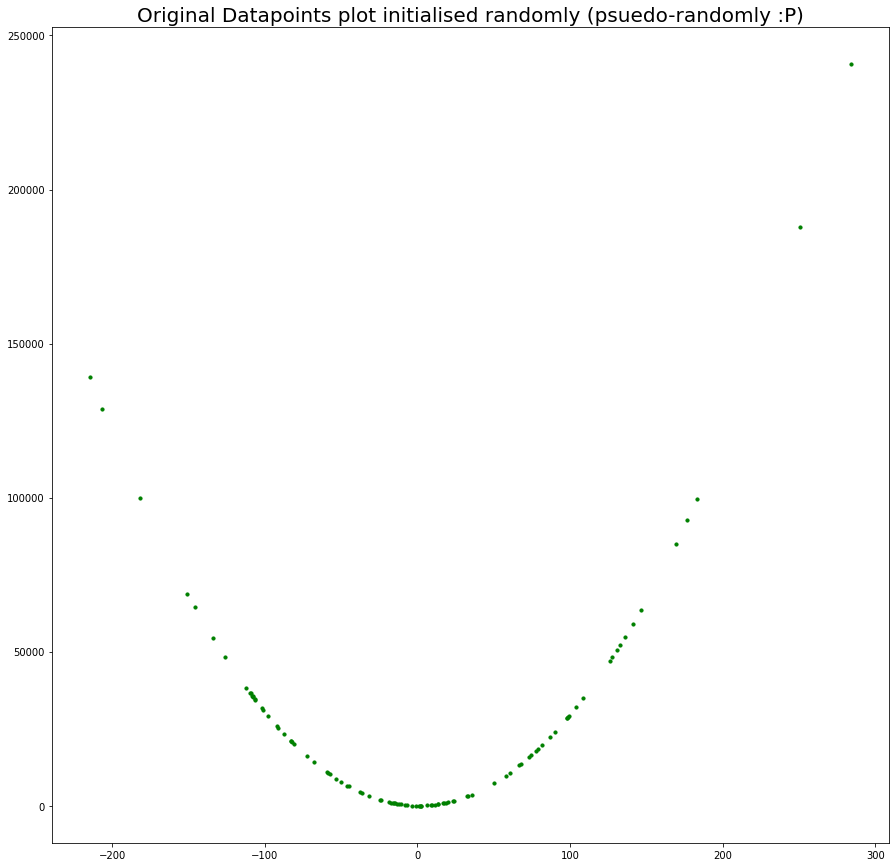

In [61]:
np.random.seed(96)
x = np.random.randint(-100,+100,100) + 100 * np.random.normal(0, 1, 100)
x=((np.unique(x)))
x.sort()
y = list(map(g,x))
plt.figure(figsize=(15,15))
plt.title("Original Datapoints plot initialised randomly (psuedo-randomly :P)",fontsize='20')
plt.scatter(x,y,s=10,color="green")

---
### Let us consider a two degree polynomial :  h(x) = mx<sup>2</sup> + nx + c  , where we will predict 'm','n', and 'c'

## a) Using |x - x̂ |⁴ as the loss metric

In [52]:
def loss_four(y,y_pred) : return (((y-y_pred)/256)**4)

In [67]:
m = 8
n = 4
c = 3
start_loss = loss_four(y[0],m*((x[0])**2)+n*x[0]+c)
print("Starting m={:.2f} n={:.2f} c={:.2f} start_loss={:.5f}".format(m,n,c,start_loss))
lr = 1e-17

ctr=0

loss_values3=[]
loss_coordinates3=[]

prev_loss=1e20

while True:
    
    net_loss=0
    grad_m=0
    grad_n=0
    grad_c=0
    
    for i in range(len(x)):
        x_val = x[i]
        y_true = y[i]
        y_pred = m*(x_val**2)+n*x_val+c
        net_loss += loss_four(y_true,y_pred)
        grad_m += ((y_true-y_pred)**3)*(-4)*(x_val**2)/1000
        grad_n += ((y_true-y_pred)**3)*(-4)*(x_val)
        grad_c += ((y_true-y_pred)**3)*(-4)*10

    net_loss /= len(x)
    grad_m/= len(x)
    grad_n/= len(x)
    grad_c/= len(x)
    
    temp_m = m-lr*grad_m
    temp_n = n-lr*grad_n
    temp_c = c-lr*grad_c
    
    while(math.isnan(temp_m)):
        grad_m *=0.5
        temp_m = m-lr*grad_m
    while(math.isnan(temp_c)):
        grad_c *=0.5
        temp_c = c-lr*grad_c
    while(math.isnan(temp_n)):
        grad_n *=0.5
        temp_n = n-lr*grad_n
    
    
    curr_y = temp_m*(x**2) + temp_n*x + temp_c
    curr_loss = sum(loss_four(y,curr_y))/len(y)
    
    while curr_loss>=prev_loss:
        
        if grad_m>grad_n and grad_m>grad_c:
            grad_m*=0.9
        elif grad_n>grad_m and grad_n>grad_c:
            grad_n*=0.9
        else:
            grad_c*=0.9
            
        temp_m = m-lr*grad_m
        temp_n = n-lr*grad_n
        temp_c = c-lr*grad_c
        
        curr_y = temp_m*(x**2) + temp_n*x + temp_c
        curr_loss = sum(loss_four(y,curr_y))/len(y)
    
    
    
    m -= lr*grad_m
    n -= lr*grad_n
    c -= lr*grad_c
    
    if ctr%1000==0:
        loss_values3.append(net_loss)
        loss_coordinates3.append(ctr)
        print("m={:.2f} n={:.2f} c={:.2f} Loss={:.3f} | lr*grad : {:.4f} | {:.4f} | {:.4f} ".format(m,n,c,net_loss,lr*grad_m,lr*grad_n,lr*grad_c))
    ctr+=1
    prev_loss=net_loss
    
    if(abs(net_loss)<0.5):
        print("END")
        break

Starting m=8.00 n=4.00 c=3.00 start_loss=631897208681.57239
m=4.37 n=-5.56 c=2.40 Loss=106267104822.650 | lr*grad : 3.6341 | 9.5644 | 0.5961 
m=3.14 n=-8.54 c=2.20 Loss=50353.496 | lr*grad : 0.0001 | 0.0001 | 0.0000 
m=3.10 n=-8.59 c=2.19 Loss=13122.894 | lr*grad : 0.0000 | 0.0000 | 0.0000 
m=3.08 n=-8.61 c=2.19 Loss=6038.990 | lr*grad : 0.0000 | 0.0000 | 0.0000 
m=3.07 n=-8.62 c=2.19 Loss=3511.131 | lr*grad : 0.0000 | 0.0000 | 0.0000 
m=3.07 n=-8.62 c=2.19 Loss=2320.677 | lr*grad : 0.0000 | 0.0000 | 0.0000 
m=3.06 n=-8.62 c=2.19 Loss=1663.282 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.06 n=-8.62 c=2.18 Loss=1260.484 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.05 n=-8.62 c=2.18 Loss=994.887 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.05 n=-8.62 c=2.18 Loss=809.920 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.05 n=-8.61 c=2.18 Loss=675.539 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.05 n=-8.61 c=2.18 Loss=574.560 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.04 n=-8.61 c=2.18 Loss=496.562 | lr*

m=3.01 n=-8.49 c=2.17 Loss=18.909 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.49 c=2.17 Loss=18.660 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=18.417 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=18.180 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=17.947 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=17.720 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=17.497 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=17.279 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=17.066 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=16.858 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=16.653 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=16.453 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=16.258 | lr*grad : 0.0000 | -0.0000 | 0.0000 
m=3.01 n=-8.48 c=2.17 Loss=16.066 | lr*grad : 0.000

KeyboardInterrupt: 

/home/merp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.5, 1.0, 'Ground Truth v/s Prediction')

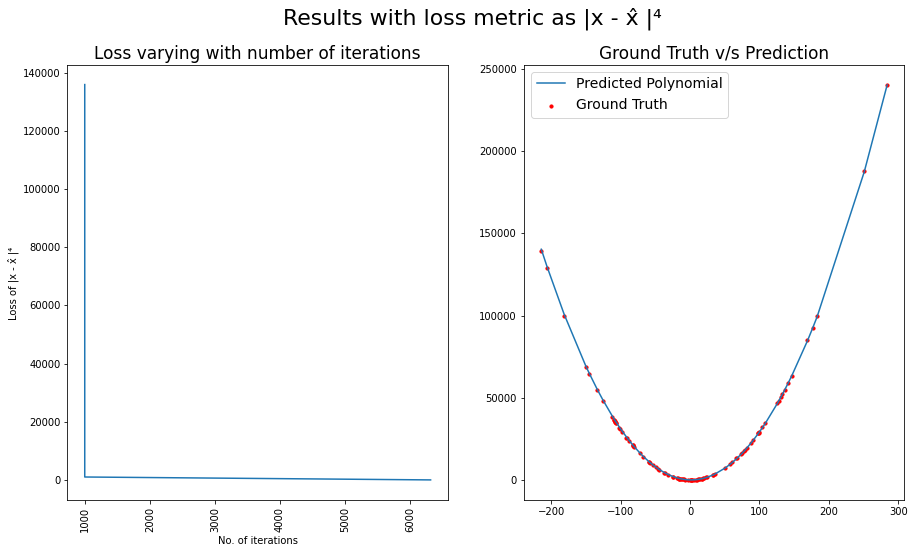

In [72]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
fig.suptitle("Results with loss metric as |x - x̂ |⁴",fontsize='22')
axs[0].plot(loss_values3,loss_coordinates3)
axs[0].set_xlabel('No. of iterations')
axs[0].set_ylabel('Loss of |x - x̂ |⁴ ')
axs[0].set_title('Loss varying with number of iterations',fontsize='17')
axs[0].set_xticklabels(loss_coordinates3,rotation='vertical')
axs[1].scatter(x,y,s=10,color='red',label='Ground Truth')
Y_PRED = m*(x**2)+n*x+c
axs[1].plot(x,Y_PRED,label='Prediciton')
axs[1].legend(['Predicted Polynomial','Ground Truth'],fontsize='14')
axs[1].set_title("Ground Truth v/s Prediction",fontsize='17')

## b) Using |x - x̂|⁷ as the loss metric

In [76]:
def loss_seven(y,y_pred) : return abs(((y-y_pred)/49/49/49)**7)

In [81]:
m2 = 15
n2 = 4
c2 = 22
lr = 1e-17
start_loss = loss_seven(y[0],m2*((x[0])**2)+n2*x[0]+c2)
print("Starting m={:.2f} n={:.2f} c={:.2f} start_loss={:.5f}".format(m2,n2,c2,start_loss))

ctr=0

loss_values4=[]
loss_coordinates4=[]

prev_loss=1e20

while True:
    
    net_loss=0
    grad_m=0
    grad_n=0
    grad_c=0
    
    for i in range(len(x)):
        x_val = x[i]
        y_true = y[i]
        y_pred = m2*(x_val**2)+n2*x_val+c2
        net_loss += loss_four(y_true,y_pred)
        grad_m += (((y_true-y_pred)/49/49/49)**6)*(-7)*(x_val**2)/49/49/49
        grad_n += (((y_true-y_pred)/49/49/49)**6)*(-7)*(x_val)/49/49/49
        grad_c += (((y_true-y_pred)/49/49/49)**6)*(-7)*10/49/49/49

    net_loss /= len(x)
    grad_m/= len(x)
    grad_n/= len(x)
    grad_c/= len(x)
    
    temp_m = m2-lr*grad_m
    temp_n = n2-lr*grad_n
    temp_c = c2-lr*grad_c
    
    while(math.isnan(temp_m)):
        grad_m *=0.5
        temp_m = m2-lr*grad_m
    while(math.isnan(temp_c)):
        grad_c *=0.5
        temp_c = c2-lr*grad_c
    while(math.isnan(temp_n)):
        grad_n *=0.5
        temp_n = n2-lr*grad_n
    
    
    curr_y = temp_m*(x**2) + temp_n*x + temp_c
    curr_loss = sum(loss_four(y,curr_y))/len(y)
    
    while curr_loss>=prev_loss:
        
        if grad_m>grad_n and grad_m>grad_c:
            grad_m*=0.9
        elif grad_n>grad_m and grad_n>grad_c:
            grad_n*=0.9
        else:
            grad_c*=0.9
            
        temp_m = m2-lr*grad_m
        temp_n = n2-lr*grad_n
        temp_c = c2-lr*grad_c
        
        curr_y = temp_m*(x**2) + temp_n*x + temp_c
        curr_loss = sum(loss_four(y,curr_y))/len(y)
    
    
    
    m2 -= lr*grad_m
    n2 -= lr*grad_n
    c2 -= lr*grad_c
    
    if ctr%1000==0:
        loss_values3.append(net_loss)
        loss_coordinates3.append(ctr)
        print("m={:.2f} n={:.2f} c={:.2f} Loss={:.3f} | lr*grad : {:.4f} | {:.4f} | {:.4f} ".format(m2,n2,c2,net_loss,lr*grad_m,lr*grad_n,lr*grad_c))
    ctr+=1
    prev_loss=net_loss
    
    if(abs(net_loss)<0.5):
        print("END")
        break

Starting m=15.00 n=4.00 c=22.00 start_loss=49119.17552
m=15.00 n=4.00 c=22.00 Loss=3487666750956.780 | lr*grad : -0.0000 | -0.0000 | -0.0000 


KeyboardInterrupt: 

Text(0.5, 1.0, 'Ground Truth v/s Prediction')

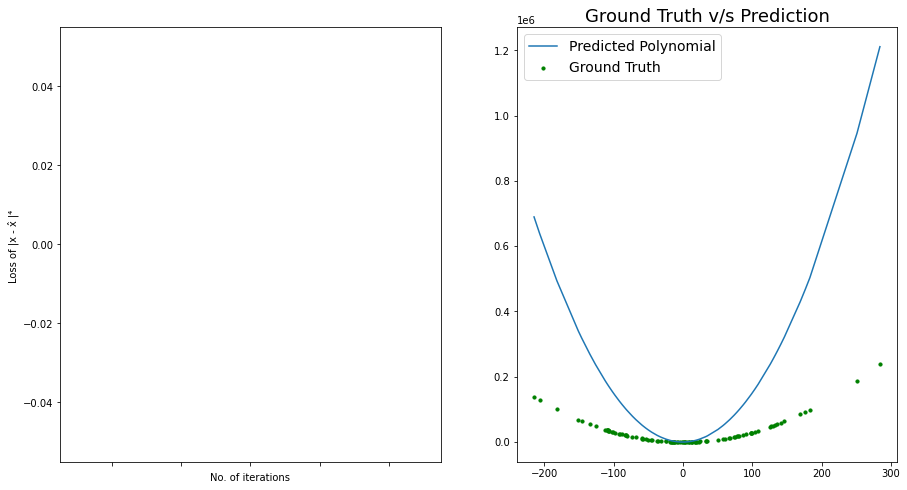

In [80]:
fig,axs=plt.subplots(1,2,figsize=(15,8))

axs[0].plot(loss_values4,loss_coordinates4)
axs[0].set_xlabel('No. of iterations')
axs[0].set_ylabel('Loss of |x - x̂ |⁴ ')
axs[0].set_xticklabels(loss_coordinates4,rotation='vertical')
axs[1].scatter(x,y,s=10,color='green',label='Ground Truth')
Y_PRED = m2*(x**2)+n2*x+c2
axs[1].plot(x,Y_PRED,label='Prediciton')
axs[1].legend(['Predicted Polynomial','Ground Truth'],fontsize='14')
axs[1].set_title("Ground Truth v/s Prediction",fontsize='18')